In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import DataConversionWarning

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
class NeuralNet:
    def __init__(self, learning_rate, num_iter, num_hidden_layers, activation, strUrl, strDelim):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.num_hidden_layers = num_hidden_layers
        self.activation = activation
        self.strUrl = strUrl
        self.strDelim = strDelim

    def preprocess(self):
        #Read the CSV file from Google Drive and create the data frame
        dataFrame = pd.read_csv('https://drive.google.com/uc?export=download&id=' +self.strUrl.split('/')[-2], encoding = 'unicode_escape', delimiter = self.strDelim)

        # To drop any blank rows
        dataFrame.dropna(axis = 0, how = 'any', thresh = None, inplace = True) 

        # Drop duplicate rows
        dataFrame.drop_duplicates(inplace=True)

        #Rebuild index after dropping rows
        dataFrame.reset_index(drop = True, inplace = True)
        
        # Convert buying Price value as 'low': 0, 'med' : 1, 'high' : 2, 'vhigh' : 3
        dataFrame.iloc[:, 0] = dataFrame.iloc[:, 0].map({'low': 0, 'med' : 1, 'high' : 2, 'vhigh' : 3})

        # Convert price of the maintenance (maint) value as 'low': 0, 'med' : 1, 'high' : 2, 'vhigh' : 3
        dataFrame.iloc[:, 1] = dataFrame.iloc[:, 1].map({'low': 0, 'med' : 1, 'high' : 2, 'vhigh' : 3})

        # Convert number of doors (doors) values as '2' : 2, '3' : 3, '4' : 4, '5more' : 5
        dataFrame.iloc[:, 2] = dataFrame.iloc[:, 2].map({'2' : 2, '3' : 3, '4' : 4, '5more' : 5})

        # Convert capacity in terms of persons to carry (persons) values as '2' : 1, '4' : 2, 'more' : 3
        dataFrame.iloc[:, 3] = dataFrame.iloc[:, 3].map({'2' : 1, '4' : 2, 'more' : 3})

        # Convert the size of luggage boot (lug_boot) values as 'small' : 1, 'med' : 2, 'big' : 3
        dataFrame.iloc[:, 4] = dataFrame.iloc[:, 4].map({'small' : 1, 'med' : 2, 'big' : 3})

        # Convert estimated safety of the car (safety) values as 'low' : 1, 'med' : 2, 'high' : 3
        dataFrame.iloc[:, 5] = dataFrame.iloc[:, 5].map({'low' : 1, 'med' : 2, 'high' : 3})

        # Convert output/class car acceptability values as 'unacc' : 0, 'acc' : 1, 'good' : 2, 'vgood' : 3
        dataFrame.iloc[:, 6] = (dataFrame.iloc[:, 6] != 'unacc').astype(int)

        X = dataFrame.iloc[:, [0, 1, 2, 3, 4, 5]]

        Y = dataFrame.iloc[:, [6]]
        
        scalar = StandardScaler()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

        # # scaling the values
        X_train = scalar.fit(X_train).fit_transform(X_train)
        
        X_test = scalar.fit(X_test).fit_transform(X_test)

        return X_train,Y_train,X_test,Y_test

    @ignore_warnings(category=ConvergenceWarning)
    @ignore_warnings(category=DataConversionWarning)
    def train_evaluate(self):
        X_train,Y_train,X_test,Y_test = self.preprocess()
        mlpClassifier = MLPClassifier(hidden_layer_sizes=self.num_hidden_layers, 
                                      max_iter=self.num_iter, solver='sgd',
                                      learning_rate_init=self.learning_rate, 
                                      activation=self.activation,
                                      early_stopping=True, verbose = False)
        temp = mlpClassifier.fit(X_train,Y_train)
        Y_pred_train = mlpClassifier.predict(X_train)
        Y_pred_test = mlpClassifier.predict(X_test)
        score = []
        for iter in range(1,self.num_iter+1,2):
            mlpClassifierInter = MLPClassifier(hidden_layer_sizes=self.num_hidden_layers, 
                                      max_iter=iter, solver='sgd',
                                      learning_rate_init=self.learning_rate, 
                                      activation=self.activation,
                                      early_stopping=True, verbose = False)
            temp = mlpClassifierInter.fit(X_train,Y_train)
            score.append(mlpClassifierInter.score(X_test,Y_test))
            iter = iter + 1
        
        print("##################")
        print("Num Iter: ")
        print(self.num_iter)
        print("Learning Rate: ")
        print(self.learning_rate)
        print("Activation: ")
        print(self.activation)
        print("Number of Hidden Layers: ")
        print(len(self.num_hidden_layers))
        print("Training Accuracy:")
        print(mlpClassifier.score(X_train,Y_train))
        print("Test Accuracy:")
        print(mlpClassifier.score(X_test,Y_test))
        print("Training Error: ")
        print(mean_squared_error(Y_train,Y_pred_train))
        print("Test Error: ")
        print(mean_squared_error(Y_test,Y_pred_test))
        print("\n")
        
        return score

##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
tanh
Number of Hidden Layers: 
2
Training Accuracy:
0.9580014482259233
Test Accuracy:
0.9595375722543352
Training Error: 
0.041998551774076756
Test Error: 
0.04046242774566474


##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
relu
Number of Hidden Layers: 
2
Training Accuracy:
0.9811730629978277
Test Accuracy:
0.9682080924855492
Training Error: 
0.01882693700217234
Test Error: 
0.031791907514450865


##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
logistic
Number of Hidden Layers: 
2
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




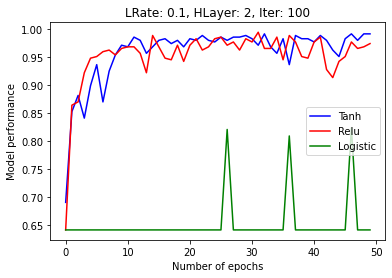

##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
tanh
Number of Hidden Layers: 
2
Training Accuracy:
0.9905865314989138
Test Accuracy:
0.9855491329479769
Training Error: 
0.00941346850108617
Test Error: 
0.014450867052023121


##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
relu
Number of Hidden Layers: 
2
Training Accuracy:
0.9507603186097031
Test Accuracy:
0.9508670520231214
Training Error: 
0.049239681390296886
Test Error: 
0.049132947976878616


##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
logistic
Number of Hidden Layers: 
2
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




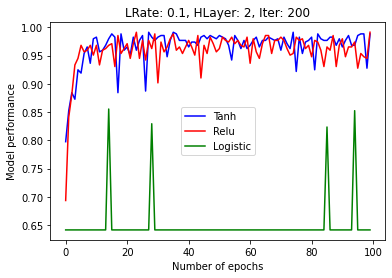

##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
tanh
Number of Hidden Layers: 
2
Training Accuracy:
0.8783490224475018
Test Accuracy:
0.846820809248555
Training Error: 
0.1216509775524982
Test Error: 
0.1531791907514451


##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
relu
Number of Hidden Layers: 
2
Training Accuracy:
0.8783490224475018
Test Accuracy:
0.838150289017341
Training Error: 
0.1216509775524982
Test Error: 
0.16184971098265896


##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
logistic
Number of Hidden Layers: 
2
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




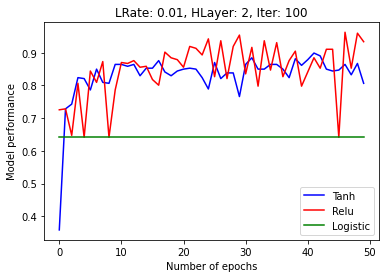

##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
tanh
Number of Hidden Layers: 
2
Training Accuracy:
0.9102099927588704
Test Accuracy:
0.8959537572254336
Training Error: 
0.08979000724112962
Test Error: 
0.10404624277456648


##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
relu
Number of Hidden Layers: 
2
Training Accuracy:
0.9587255611875453
Test Accuracy:
0.9479768786127167
Training Error: 
0.041274438812454746
Test Error: 
0.05202312138728324


##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
logistic
Number of Hidden Layers: 
2
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




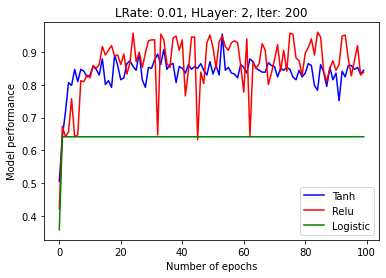

##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
tanh
Number of Hidden Layers: 
3
Training Accuracy:
0.9934829833454019
Test Accuracy:
0.9710982658959537
Training Error: 
0.0065170166545981175
Test Error: 
0.028901734104046242


##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
relu
Number of Hidden Layers: 
3
Training Accuracy:
0.997103548153512
Test Accuracy:
0.9826589595375722
Training Error: 
0.002896451846488052
Test Error: 
0.017341040462427744


##################
Num Iter: 
100
Learning Rate: 
0.1
Activation: 
logistic
Number of Hidden Layers: 
3
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




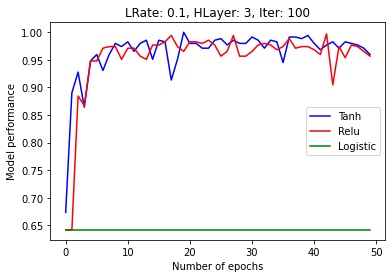

##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
tanh
Number of Hidden Layers: 
3
Training Accuracy:
0.9768283852280956
Test Accuracy:
0.9855491329479769
Training Error: 
0.023171614771904415
Test Error: 
0.014450867052023121


##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
relu
Number of Hidden Layers: 
3
Training Accuracy:
0.9304851556842868
Test Accuracy:
0.9017341040462428
Training Error: 
0.06951484431571325
Test Error: 
0.09826589595375723


##################
Num Iter: 
200
Learning Rate: 
0.1
Activation: 
logistic
Number of Hidden Layers: 
3
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




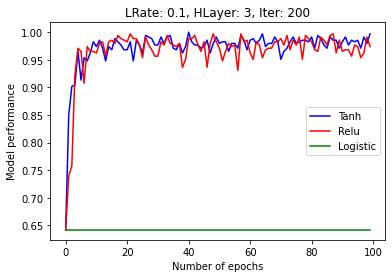

##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
tanh
Number of Hidden Layers: 
3
Training Accuracy:
0.9572773352643013
Test Accuracy:
0.9479768786127167
Training Error: 
0.042722664735698766
Test Error: 
0.05202312138728324


##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
relu
Number of Hidden Layers: 
3
Training Accuracy:
0.9558291093410572
Test Accuracy:
0.9277456647398844
Training Error: 
0.044170890658942794
Test Error: 
0.07225433526011561


##################
Num Iter: 
100
Learning Rate: 
0.01
Activation: 
logistic
Number of Hidden Layers: 
3
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




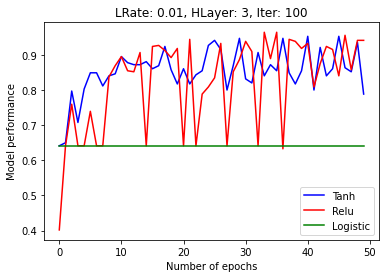

##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
tanh
Number of Hidden Layers: 
3
Training Accuracy:
0.8841419261404779
Test Accuracy:
0.8583815028901735
Training Error: 
0.11585807385952208
Test Error: 
0.1416184971098266


##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
relu
Number of Hidden Layers: 
3
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734


##################
Num Iter: 
200
Learning Rate: 
0.01
Activation: 
logistic
Number of Hidden Layers: 
3
Training Accuracy:
0.7146994931209268
Test Accuracy:
0.6416184971098265
Training Error: 
0.28530050687907316
Test Error: 
0.3583815028901734




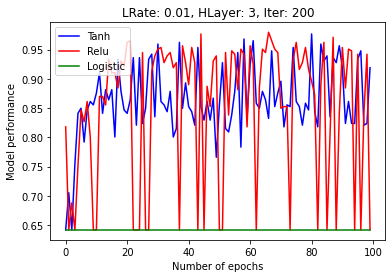

<Figure size 432x288 with 0 Axes>

In [3]:
num_hidden_layers = [(10,10),(10,10,10)]
learning_rate = [0.1,0.01]
activation = ['tanh','relu','logistic']
num_iter = [100,200]

strUrl = 'https://drive.google.com/file/d/17AF7-MV6AVsILc16dvRQIm7b3R-BXLqN/view?usp=sharing'
strDelim = ','

score_list = []
v=0
for i in range(0,2):
  for j in range(0,2):
    for l in range(0,2):
      for k in range(0,3):
        nn = NeuralNet(learning_rate[j], num_iter[l], num_hidden_layers[i], activation[k], strUrl, strDelim)
        score = nn.train_evaluate()
        score_list.append(score)
        
        v = v+1
        if activation[k] == 'tanh':
            plt.plot(score, "-b", label="Tanh")
            

        if activation[k] == 'relu':
            plt.plot(score, "-r", label="relu")
            
        
        if activation[k] == 'logistic':
            plt.plot(score, "-g", label="Logistic")
            

        plt.legend(["Tanh", "Relu", "Logistic"], loc ="best")
        plt.title("LRate: "+str(learning_rate[j])+", HLayer: "+str(len(num_hidden_layers[i]))+", Iter: "+str(num_iter[l]))
        if (v%3==0):
            plt.ylabel("Model performance")
            plt.xlabel("Number of epochs")
            plt.savefig(str(v)+".png")
            plt.show();
            plt.clf()